# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.append(os.getcwd() + '/refi')
import retirement_simulation as rs
import utils.constants
import utils.loaders

# Constants

In [53]:
initial_balance = 400000

initial_age = 30
initial_deferral = 25000
retirement_age = 60
retirement_consumption = 75000

initial_cpi = 275
retirement_ssb = 10000
benefits_age = 67
death_age = 100

asset_return_pctile = 10

glidepath = utils.constants.fidelity_glidepath

# Load Retirement Simulation Inputs

In [54]:
portfolio, deferral, consumption, inflation, cpi, ssb = utils.loaders.load_ret_sim_inputs(
    initial_age,
    retirement_age,
    death_age,
    benefits_age,
    asset_return_pctile,
    initial_cpi,
    initial_deferral,
    initial_balance,
    retirement_consumption,
    retirement_ssb,
    glidepath
)

In [55]:
eq_ret, bond_ret, cash_ret = [asset.static_value for asset in portfolio.assets]
inflation_rate = inflation.static_value

In [56]:
print('Equity geometric mean return: {0:.4f}%'.format(100 * eq_ret))
print('Bonds geometric mean return: {0:.4f}%'.format(100 * bond_ret))
print('Cash geometric mean return: {0:.4f}%'.format(100 * cash_ret))
print('Inflation geometric mean rate: {0:.4f}%'.format(100 * inflation_rate))

Equity geometric mean return: 8.0591%
Bonds geometric mean return: 2.8423%
Cash geometric mean return: 1.9556%
Inflation geometric mean rate: 3.1000%


# Retirement Simulation

In [57]:
retirement_simulation = rs.RetirementSimulation(
    initial_age=initial_age,
    retirement_age=retirement_age,
    death_age=death_age,
    portfolio=portfolio,
    deferral_scenario=deferral,
    consumption_scenario=consumption,
    inflation_scenario=inflation,
    cpi_scenario=cpi,
    ssb_scenario=ssb)

In [58]:
retirement_simulation.simulate()

# Output

In [61]:
retirement_simulation.period

69

In [62]:
retirement_simulation.portfolio.history

array([  400000.        ,   456996.36895   ,   519117.08857217,
         586773.78228415,   660409.86365467,   740502.95456954,
         827567.48622025,   922157.49670302,  1024869.64005467,
        1136346.42266904,  1257279.68423831,  1388414.34165568,
        1530552.41570404,  1684557.36184938,  1851358.72806287,
        2031957.16432274,  2227429.8103038 ,  2438936.08975902,
        2667723.94224452,  2915136.5251482 ,  3182619.42146439,
        3471728.39142662,  3784137.70898081,  4121649.12716786,
        4486201.51980348,  4879881.25041213,  5304933.32320925,
        5757516.83534603,  6238699.39887443,  6749530.38975185,
        7291034.72110031,  7596954.73829296,  7905730.14882643,
        8216370.64720166,  8527802.89408254,  8838871.66374119,
        9148341.74031984,  9462948.82062464,  9815119.92887631,
       10174585.86801541, 10541053.14384449, 10914189.2216234 ,
       11294411.01010314, 11681412.61970587, 12074831.18192166,
       12474283.58319375, 12879325.55128

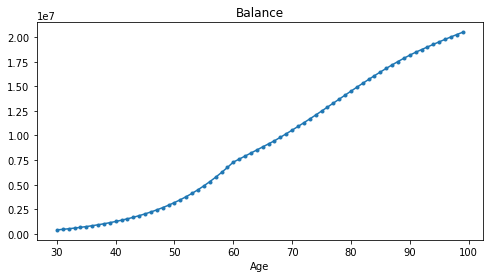

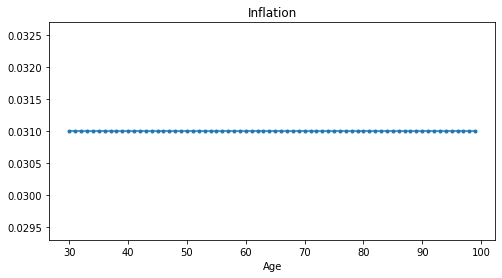

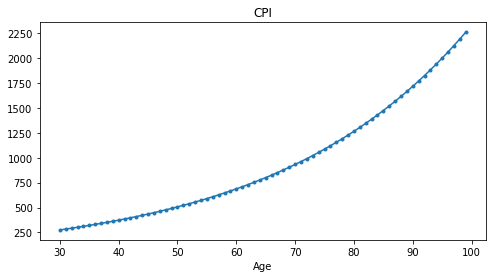

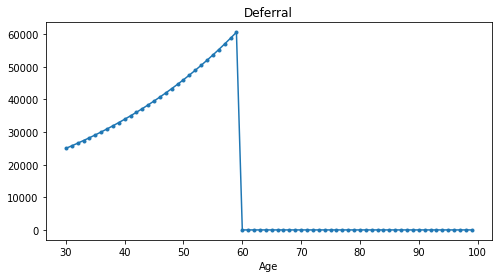

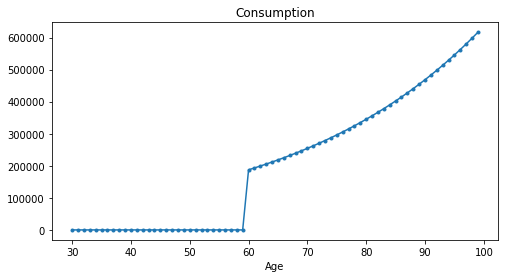

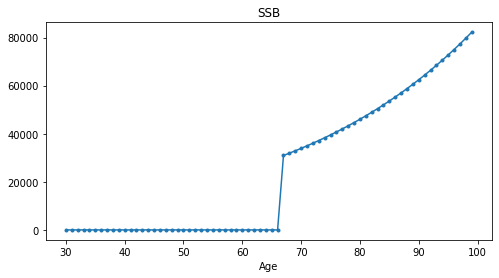

In [59]:
retirement_simulation.plot()